In [1]:
#import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data via pandas
df = pd.read_csv('Loan payments data.csv')

In [3]:
#take a look at dataframe 
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
#how mant columns and how amny rows
df.shape

(500, 11)

In [5]:
#take a look at data type of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [6]:
#look at trends of data frame
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


### This indicates that the average age of the dataframe is 31, the average number of past due days is 36, the loan terms are from a min of 7 years to a max of 30 years with an average of 22 years.  The mean principal amount of the loan is 943 dollars with a min of 300 and a max of 1000 dollars.  This indicates that there are more people on the higher end of loans around 1000 dollars than there are at 300 dollars.

In [7]:
#look for any missing data 
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [8]:
#fill in missing data for past due days with zero
df.past_due_days.fillna(0, inplace=True)
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days       0
age                 0
education           0
Gender              0
dtype: int64

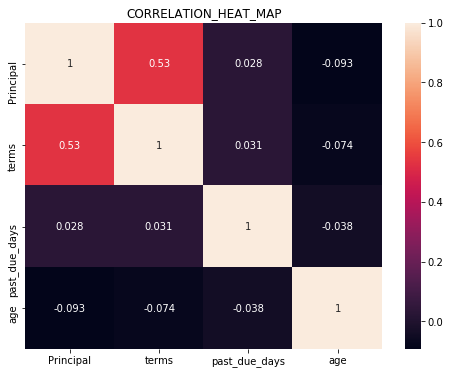

In [13]:
#look for trends/correlations by plotting a correlation heatmap
plt.subplots(figsize=(8,6))
ax = plt.axes()
ax.set_title("CORRELATION_HEAT_MAP")
corr = df.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Some findings on the correlation heatmap is that the loan term and due_day are inversely correlated while the loan term and due_month are directly correlated. Term and Principal are also directly correlated so the larger the principal of the loan, the longer the term of the loan.

In [14]:
#300 to 399 has NaN while all other rows have past_due_days less than 59
#current date shows 12/8/2016,create separate dataframe for non-paid loans/collections

df_not_paid = df.iloc[300:400,:]

In [15]:
#take a look at not paid(collections) dataframe
df_not_paid.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male


In [16]:
#take a look at average age of loan holder in not paid status
df_not_paid.age.mean()

30.61

In [17]:
#take a look at education for collections group
df.education.value_counts()

college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: education, dtype: int64

In [18]:
#take a look at average number of days that loan has not been paid
df_not_paid.past_due_days.mean()

62.86

### The average age of a loan holder in not paid status is 30.6 years and the average number of days that the loan has not been paid is 62.9 days. 

In [19]:
#take a look at average number of days that loan has not been paid
df_not_paid.past_due_days.value_counts()

59.0    40
74.0    25
60.0    13
75.0     7
29.0     4
76.0     3
58.0     2
44.0     2
61.0     2
28.0     1
73.0     1
Name: past_due_days, dtype: int64

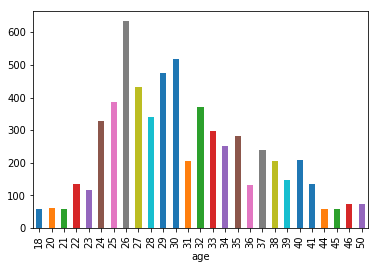

In [20]:
#take a look at the relationship between age and the no of past due days 
df_not_paid.groupby('age').past_due_days.sum().plot(kind='bar')

### Plotting the groupby of the sum of days a loan is past due and the age is 26 years old with second highest at 30 years old and third highest at 29 years old.  The highest past due date within this dataset is 76 days and the lowest is 28 days.  

In [21]:
#take a look at gender distribution of those not paid and those paid
df_not_paid.Gender.value_counts()

male      90
female    10
Name: Gender, dtype: int64

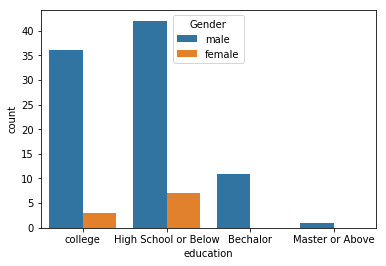

In [22]:
#plot education and age trends for loans not paid
sns.countplot(x='education', data=df_not_paid, hue='Gender')  

### Exploratory data analysis of this dataset shows that there are 423 males and 77 females in the entire dataset and that 21% of males and 12% of females in the dataset defaulted on loans.  In the total dataset, there are 209 with high school education, 220 with college education, 67 with bachelors degrees and 4 with masters degrees.  Of those, 23% of high school defaulted on loans, 18% of college defaulted on loans, 16% of bachelors defaulted on loans and 25 % of masters defaulted on loans.  The visualizations show that there are more in college loans perhaps due to the loans being student loans.  The percentage of defaulted loans is highest in the masters education category perhaps statistically due to there not being a lot of masters loans represented in the dataset.

In [23]:
# take a look at how the principal loan amount is distributed in the collection group
df_not_paid.Principal.value_counts(ascending=False)

1000    77
800     23
Name: Principal, dtype: int64

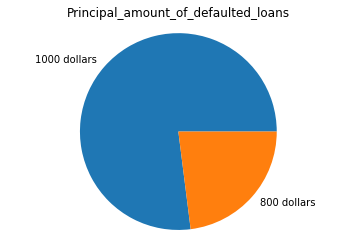

In [24]:
#take a look at visualization of principal loan amount on pie chart 
labels = '1000 dollars','800 dollars'
sizes = [77, 23]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
ax1.axis('equal')
plt.title("Principal_amount_of_defaulted_loans")
plt.show()

### The pie chart shows the majority of defaulted loans are in the amount of 1000 dollars and the second amount is similar at 800 dollars.

In [25]:
#take a look at trends for the loan terms in the collections group 
df_not_paid.terms.value_counts(ascending=False)

30    59
15    41
Name: terms, dtype: int64

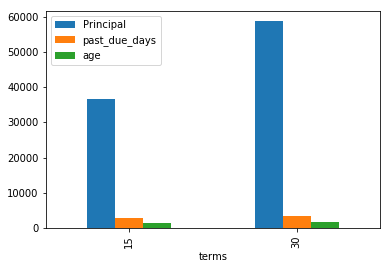

In [26]:
#plot principal and terms together to look for trends in collections group 
df_not_paid.groupby('terms').sum().plot(kind='bar')

### Exploratory data analysis shows that 59% have a 30 year term and 41% have a 15 year term.  According to the plot, the longer term loans also have a larger loan principal amount. 

In [27]:
#utilize pandas time series analysis on due date
from datetime import datetime, timedelta
df_not_paid['due_date'] = pd.to_datetime(df_not_paid.due_date)

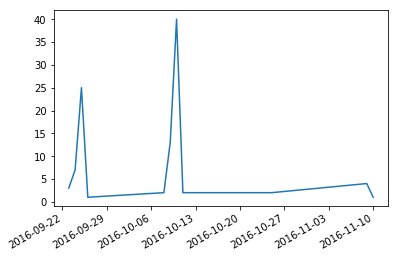

In [28]:
#plot visualization of counts of due date to look for trends
df_not_paid.due_date.value_counts().sort_index().plot()

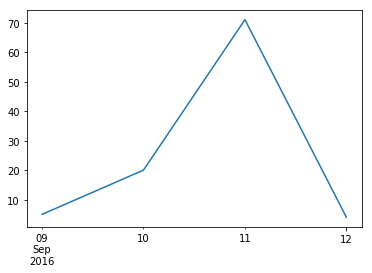

In [29]:
#use pandas date time series to plot effective date of loan in collections group. 
df_not_paid['effective_date'] = pd.to_datetime(df_not_paid.effective_date)
df_not_paid.effective_date.value_counts().sort_index().plot()

### The majority of due dates fall in early October and end of September which could possibly indicate that some of these defauted loans are student loans. Also the majority of loans occur on a Sunday(Sept 11).  

In [30]:
#create copy of original dataframe in order to drop not paid rows and explore data trends of loans paid
df_copy = df.copy()

In [31]:
#use copy to create data frame that includes the 400 folks that have paid their loan
df_copy.drop(df.index[300:400], inplace=True)
df_copy.shape

(400, 11)

In [32]:
#take a look at paid group dataframe
df_copy.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [33]:
#take a look at average age of loan holder in paid loan status
df_copy.age.mean()

31.2425

In [34]:
#take a look at average number of days that loan had not been paid in paid loan group
df_copy.past_due_days.mean()

2.29

In [35]:
#take a look at distribution of past due days in paid off loan group
df_copy.past_due_days.value_counts()

0.0     300
2.0      22
1.0      18
3.0      14
4.0       8
5.0       5
29.0      3
27.0      3
14.0      3
7.0       3
13.0      2
6.0       2
12.0      2
24.0      2
25.0      2
44.0      1
8.0       1
56.0      1
28.0      1
23.0      1
38.0      1
19.0      1
52.0      1
51.0      1
9.0       1
36.0      1
Name: past_due_days, dtype: int64

### Majority of folks in paid off loan group, that is to say 300 out of 400, have no past due days and the highest past due days before payment was 56 days.  Exploratory data analysis could also be done on the 300 out of the total 500 folks that have paid off their loan in a timely manner.  The average age is a little bit older than the collections group at 31.2 years.  

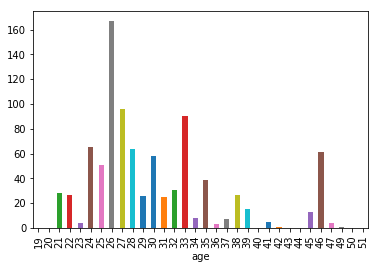

In [36]:
#take a look at the relationship between age and the no of past due days in paid loans group 
df_copy.groupby('age').past_due_days.sum().plot(kind='bar')

### Even though the average age was 31.2, according to the plot above, the highest past due days lies in the age bracket of 26 years old similar to the collections dataset but what is different is the second largest group is 27 years old and the third largest group is at 33 years old.  

In [37]:
#take a look at gender distribution of paid loans
df_copy.Gender.value_counts()

male      333
female     67
Name: Gender, dtype: int64

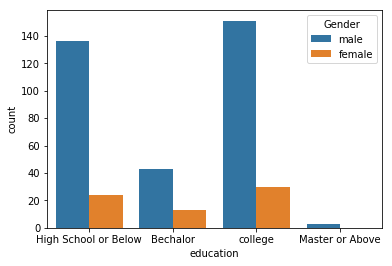

In [38]:
#plot education and age trends for paid loans
sns.countplot(x='education', data=df_copy, hue='Gender')

In [39]:
# take a look at how the principal loan amount is distributed in paid off loan group
df_copy.Principal.value_counts(ascending=False)

1000    300
800      88
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

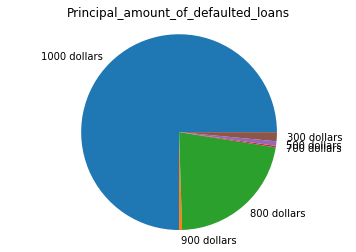

In [40]:
#take a look at visualization of principal loan amount on pie chart 
labels = '1000 dollars','900 dollars','800 dollars','700 dollars','500 dollars','300 dollars'
sizes = [75,.5,22,.25,.75,1.5]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
ax1.axis('equal')
plt.title("Principal_amount_of_defaulted_loans")
plt.show()

### There are 78% of males in paid off loan group and 87% of females in paid off loan group.  Also similar to the collections group, the majority of loans in this data set are of amount 1000 dollars and second highest amount is 800 dollars.  

In [41]:
#take a look at trends for the loan terms in the paid off loan group 
df_copy.terms.value_counts(ascending=False)

30    213
15    166
7      21
Name: terms, dtype: int64

### What is interesting about the terms in the paid off loan group is that they are more evenly distributed between 15 and 30 year loans and there are also a few 7 year loans.  

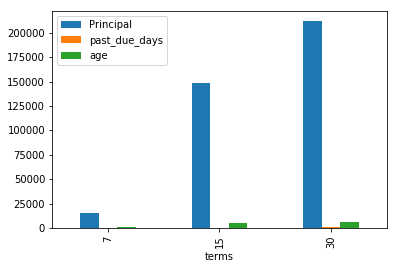

In [42]:
#plot principal and terms together to look for trends in paid off loan group 
df_copy.groupby('terms').sum().plot(kind='bar')

### Similar to the collections group plot, the longer term loans have a larger loan principal amount. Similar to the collection plot, there are also more past due days in the larger principal amount, longer loan term category.

In [43]:
#utilize pandas time series analysis on due date
from datetime import datetime, timedelta
df_copy['due_date'] = pd.to_datetime(df_copy.due_date)

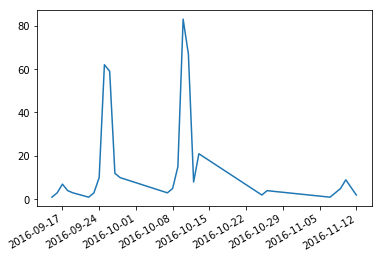

In [44]:
#plot visualization of counts of due date to look for trends in paid off group 
df_copy.due_date.value_counts().sort_index().plot()

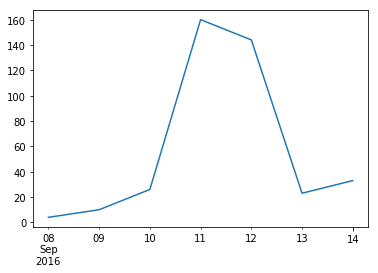

In [45]:
#use pandas date time series to plot effective date of loan in paid off loan group. 
df_copy['effective_date'] = pd.to_datetime(df_copy.effective_date)
df_copy.effective_date.value_counts().sort_index().plot()

### The plot for counts of due date were similar as that seen in the collections group however the effective date shows two peaks for the non-collections group of Sept 11 and Sept 12 whereas the collections group showed one peak for the effective date on Sept 11.  This further indicates that many of these loans could be student loans.

In [46]:
# the previous data set included collection paid off group however this data set will explore group with zero past due days
df_non_collection = df.iloc[0:300,:]
df_non_collection.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female


In [47]:
#take a look at average age in the non-collections group
df_non_collection.age.mean()

31.21

### The ages with the highest percentage of paid on time loans are: 19,20,31, 42,43,44, 50 and 51.  The ages with the highest collections percentages are 24, 25, 32, 40, 41.  Based on this, after 41 years of age there is less default on loan and before 21 years of age there is less default on loan. 

In [48]:
#take a look at education of non-collections group
df_non_collection.education.value_counts()

college                 133
High School or Below    123
Bechalor                 41
Master or Above           3
Name: education, dtype: int64

### In the non-collections group with no past due days on loan, there are 44% College, 41% High School, 14% Bachelors degrees and  1% Masters.  Out of the total 220 college, there are 60 % in the non-collections group. Out of the total 209 High School, there are 59% in the non-collections group.  Out of the total 67 Bachelors degrees, there are 62% in the non-collections group and out of the total 4 Masters, there are a total of 75% in the non-collections group. 

In [49]:
#take a look at gender distribution of paid loan group
df_non_collection.Gender.value_counts()

male      247
female     53
Name: Gender, dtype: int64

In [50]:
#get percentages by getting value counts of gender across entire dataframe
df.Gender.value_counts()

male      423
female     77
Name: Gender, dtype: int64

### 58% of males have paid loan on time and 68% of females have paid loan on time and 60% of total loan holders have paid loan on time.  

In [51]:
# take a look at how the principal loan amount is distributed in collection group
df_non_collection.Principal.value_counts(ascending=False)

1000    220
800      69
300       6
500       2
900       2
700       1
Name: Principal, dtype: int64

### 58% of 1000 dollar loan, 62% of 800 dollar loan and 100% of 300 dollar loan have been paid on time.  This shows indirect correlation between loan amount and paying loan on time.

In [52]:
#take a look at trends for the loan terms in the paid off loan group 
df_non_collection.terms.value_counts(ascending=False)

30    153
15    127
7      20
Name: terms, dtype: int64

In [53]:
#take a look at trends for the loan terms in the entire loan group 
df.terms.value_counts(ascending=False)

30    272
15    207
7      21
Name: terms, dtype: int64

###  This shows 56% of 30 year term loans, 61% of 15 year loans and 95% of 7 year loans pay their loan on time.  This also shows an indirect correlation between length of loan and paying loan on time.  

In [77]:
#convert all categorical columns to numeric; start with date time objects to day of week value
df['effective_date'] = pd.to_datetime(df.effective_date)

df['effective_day'] = df.effective_date.dt.dayofweek 
df.effective_day.value_counts()

6    231
0    148
5     46
2     33
1     23
4     15
3      4
Name: effective_day, dtype: int64

In [78]:
df['due_date'] = pd.to_datetime(df.due_date)                                     
df['due_day'] = df.due_date.dt.dayofweek
df['due_month'] = df.due_date.dt.month
df.due_day.value_counts()
df.due_month.value_counts()

10    267
9     211
11     22
Name: due_month, dtype: int64

In [79]:
#create dummy variable for education and gender and then concat all columns
schooling = pd.get_dummies(df['education'])
gender = pd.get_dummies(df['Gender'])
df_numeric = pd.concat([df, schooling, gender], axis=1)
print(df_numeric.head())

       Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30     2016-09-08 2016-10-07   
1  xqd20168902     PAIDOFF       1000     30     2016-09-08 2016-10-07   
2  xqd20160003     PAIDOFF       1000     30     2016-09-08 2016-10-07   
3  xqd20160004     PAIDOFF       1000     15     2016-09-08 2016-09-22   
4  xqd20160005     PAIDOFF       1000     30     2016-09-09 2016-10-08   

     paid_off_time  past_due_days  age             education  Gender  \
0  9/14/2016 19:31            0.0   45  High School or Below    male   
1   10/7/2016 9:00            0.0   50              Bechalor  female   
2  9/25/2016 16:58            0.0   33              Bechalor  female   
3  9/22/2016 20:00            0.0   27               college    male   
4  9/23/2016 21:36            0.0   28               college  female   

   effective_day  due_day  due_month  Bechalor  High School or Below  \
0              3        4         10         0    

### Create a supervised machine learning model that classifies between who pays loan and who does not pay loan

In [80]:
#drop the categorical columns or any unecessary columns such as response vector column
df_numeric['status'] = df_numeric.loan_status.map({'PAIDOFF':0,'COLLECTION_PAIDOFF':0, 'COLLECTION':1})
df_numeric.drop(['Loan_ID','loan_status','effective_date','due_date','paid_off_time','Gender','education','past_due_days'], axis=1, inplace=True)
df_numeric.rename(columns = {'Bechalor':'bachelor_degree','college':'in_college'}, inplace=True)
df_numeric.head()

,Principal,terms,age,effective_day,due_day,due_month,bachelor_degree,High School or Below,Master or Above,in_college,female,male,status
0,1000,30,45,3,4,10,0,1,0,0,0,1,0
1,1000,30,50,3,4,10,1,0,0,0,1,0,0
2,1000,30,33,3,4,10,1,0,0,0,1,0,0
3,1000,15,27,3,3,9,0,0,0,1,0,1,0
4,1000,30,28,4,5,10,0,0,0,1,1,0,0


In [81]:
y = df_numeric['status'].values
print(type(y))
print(y.shape)
x_cols = ['Principal','terms','effective_day','due_day','due_month','age','bachelor_degree','High School or Below','Master or Above','in_college','female','male']
X = df_numeric[x_cols].as_matrix()
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(500,)
<class 'numpy.ndarray'>
(500, 12)


In [82]:
#split data into a train and test set,create a decision tree classifier object
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dec_tre = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=4)
#train decision tree classifier
dec_tre.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 12) (150, 12) (350,) (150,)


In [83]:
#predict the response for the test dataset and print the decision tree model accuracy
from sklearn import metrics
dec_tre_pred = dec_tre.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,dec_tre_pred))

Accuracy: 0.78


In [84]:
#perform cross-validation on decision tree model
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
scores = cross_val_score(dec_tre, X, y, cv=10)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.73


In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'random_state': [1,5,42],
    'max_depth': [1,10,100]}
dec_tre_cv = GridSearchCV(dec_tre,param_grid,cv=10)
dec_tre_cv.fit(X,y)
print(dec_tre_cv.best_params_)
print(dec_tre_cv.best_score_)

{'max_depth': 1, 'random_state': 1}
0.8


In [86]:
#check if the correct features were selected
df_feature = df_numeric.drop(['status'], axis=1)
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(dec_tre, threshold = .03)
sel.fit(X,y)
sel.get_support(indices=True)
selected_feat=df_feature.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

8
Index(['terms', 'age', 'effective_day', 'due_day', 'due_month',
       'bachelor_degree', 'female', 'male'],
      dtype='object')


In [87]:
x2_cols = ['terms', 'age', 'effective_day','due_day', 'due_month', 'bachelor_degree','in_college', 'female']
X2 = df_numeric[x2_cols].as_matrix()
dec_tre = DecisionTreeClassifier(max_depth=1)
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.3,random_state=4)
dec_tre.fit(X2_train,y_train)
dec_tre_pred = dec_tre.predict(X2_test)
print("Decision Tree Accuracy on best selected features:",metrics.accuracy_score(y_test,dec_tre_pred))
scores = cross_val_score(dec_tre, X2, y, cv=10)
print("Average Decision Tree cross-validation score on best selected features: {:.2f}".format(scores.mean()))

Decision Tree Accuracy on best selected features: 0.826666666667
Average Decision Tree cross-validation score on best selected features: 0.80


In [88]:
#perform confusion matrix on decision tree classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
dec_tre.fit(X2_train, y_train)
dec_tre_pred = dec_tre.predict(X2_test)
conf_matrix_dec_tre = confusion_matrix(y_test, dec_tre_pred)
print(conf_matrix_dec_tre)
print(classification_report(y_test,dec_tre_pred))
auc = roc_auc_score(y_test,dec_tre_pred)
print('AUC: % .3f' % auc)

[[124   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       0.00      0.00      0.00        26

    accuracy                           0.83       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.68      0.83      0.75       150

AUC:  0.500


In [73]:
#import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.3,random_state=4)
gnb.fit(X2_train,y_train)
gnb_pred = gnb.predict(X2_test)
print("Accuracy:",metrics.accuracy_score(y_test, gnb_pred))
score_gnb = cross_val_score(gnb, X2, y,cv=10)
print("CV_accuracy:", score_gnb.mean())

Accuracy: 0.713333333333
CV_accuracy: 0.656


In [74]:
#calculate confusion matrix for Gaussian naive bayes
gnb.fit(X2_train, y_train)
gnb_pred = gnb.predict(X2_test)
conf_matrix_gnb = confusion_matrix(y_test, gnb_pred)
print(conf_matrix_gnb)
print(classification_report(y_test,gnb_pred))

[[92 32]
 [11 15]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       124
           1       0.32      0.58      0.41        26

    accuracy                           0.71       150
   macro avg       0.61      0.66      0.61       150
weighted avg       0.79      0.71      0.74       150



In [90]:
#the classification report here looks better than the other models therefore take a look at the auc curve 
auc = roc_auc_score(y_test,gnb_pred)
print('AUC: % .3f' % auc)

AUC:  0.659


In [91]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=4) 
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X2_train,y_train)
rfc_pred=rfc.predict(X2_test)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))
score_rfc = cross_val_score(rfc, X2, y,cv=10)
print("CV_accuracy:", score_rfc.mean())

Accuracy: 0.786666666667
CV_accuracy: 0.734


In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'random_state': [1,5,42],
    'max_depth': [1,10,100],
'n_estimators':[10,100,200], 'min_samples_leaf':[1,2,5], 'min_samples_split':[2,5,10]}
rfc_cv = GridSearchCV(rfc,param_grid,cv=4)
rfc_cv.fit(X,y)
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 1}
0.8


In [93]:
#utilize tuned hyperparameters
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=4) 
rfc=RandomForestClassifier(max_depth= 1, min_samples_leaf= 1, min_samples_split = 2, n_estimators = 10)
rfc.fit(X2_train,y_train)
rfc_pred=rfc.predict(X2_test)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))
score_rfc = cross_val_score(rfc, X2, y,cv=10)
print("CV_accuracy:", score_rfc.mean())

Accuracy: 0.826666666667
CV_accuracy: 0.8


In [94]:
#calculate precision and recall for random forest classifier
rfc.fit(X2_train, y_train)
rfc_pred = rfc.predict(X2_test)
conf_matrix_rfc = confusion_matrix(y_test, rfc_pred)
print(conf_matrix_rfc)
print(classification_report(y_test,rfc_pred))
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,rfc_pred)
print('AUC: % .3f' % auc)

[[124   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       0.00      0.00      0.00        26

    accuracy                           0.83       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.68      0.83      0.75       150

AUC:  0.500


In [95]:
#import kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.3,random_state=4)
knn.fit(X2_train,y_train)
knn_pred = knn.predict(X2_test)
print("knn test accuracy with all features is:",metrics.accuracy_score(y_test, knn_pred))
#also check cross validation score
scores = cross_val_score(knn,X2,y,cv=10,scoring='accuracy')
print("Average knn classifier cross-validation score on original features: {:.2f}".format(scores.mean()))

knn test accuracy with all features is: 0.806666666667
Average knn classifier cross-validation score on original features: 0.74


[0.71399999999999997, 0.76000000000000001, 0.7340000000000001, 0.75600000000000001, 0.7380000000000001, 0.77000000000000002, 0.76000000000000001, 0.77600000000000002, 0.76600000000000013, 0.78400000000000003, 0.77200000000000002, 0.77000000000000002, 0.76600000000000001, 0.77200000000000002, 0.77600000000000002, 0.78199999999999992, 0.77400000000000002, 0.78200000000000003, 0.78400000000000003, 0.79200000000000004, 0.78600000000000003, 0.80000000000000004, 0.79200000000000004, 0.80000000000000004, 0.79800000000000004]


Text(0,0.5,'Cross-Validation accuracy')

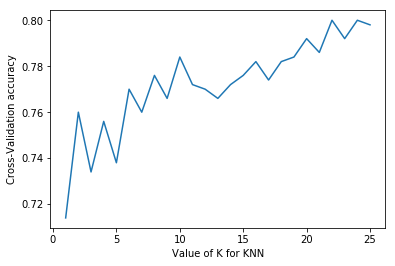

In [96]:
#search for the optimal value for k to improve the knn model
k_range = range(1,26)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X2,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
#plot value of k for KNN vs cross-validation accuracy in order to pick optimum k
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validation accuracy")

In [97]:
#utilize optimum k and compare KNN model with decision tree classifier accuracy;also compare against cross-validation
knn = KNeighborsClassifier(n_neighbors=22)
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.3,random_state=4)
knn.fit(X2_train,y_train)
knn_pred = knn.predict(X2_test)
print("knn test accuracy with optimum k value:",metrics.accuracy_score(y_test, knn_pred))
print("knn cross_val_score with optimum k value:",cross_val_score(knn,X2,y,cv=10,scoring='accuracy').mean())    

knn test accuracy with optimum k value: 0.826666666667
knn cross_val_score with optimum k value: 0.8


In [98]:
knn.fit(X2_train, y_train)
knn_pred = knn.predict(X2_test)
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
print(conf_matrix_knn)
print(classification_report(y_test,knn_pred))
auc = roc_auc_score(y_test,knn_pred)
print('AUC: % .3f' % auc)

[[124   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       0.00      0.00      0.00        26

    accuracy                           0.83       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.68      0.83      0.75       150

AUC:  0.500


In [99]:
#utilize SVM classifier and compare model prediction accuracy 
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)
svmc = SVC(kernel='linear',cache_size=5)
svmc.fit(X_train, y_train)
svmc_pred = svmc.predict(X_test)
print("Test_Accuracy:",metrics.accuracy_score(y_test, svmc_pred))
score_svmc = cross_val_score(svmc, X, y,cv=10)
print(score_svmc)
print("CV_accuracy:", score_svmc.mean())

Test_Accuracy: 0.826666666667
[ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]
CV_accuracy: 0.8


In [100]:
#calculate the confusion matrix for SVC
svmc.fit(X_train, y_train)
svmc_pred = svmc.predict(X_test)
conf_matrix_svmc = confusion_matrix(y_test, svmc_pred)
print(conf_matrix_svmc)
print(classification_report(y_test,svmc_pred))
auc = roc_auc_score(y_test,svmc_pred)
print('AUC: % .3f' % auc)

[[124   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       124
           1       0.00      0.00      0.00        26

    accuracy                           0.83       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.68      0.83      0.75       150

AUC:  0.500


In [101]:
#import keras sequential model in order to see how deep learning model compares
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras.optimizers import SGD
numpy.random.seed(4)
model = Sequential()
model.add(Dense(1,input_dim=12, init='zero', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=.0001), metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=10,shuffle=False, verbose=1)
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Using TensorFlow backend.


Epoch 1/10
500/500 [==============================] - 0s 860us/step - loss: 3.2375 - acc: 0.8000
Epoch 2/10
500/500 [==============================] - 0s 156us/step - loss: 3.2236 - acc: 0.8000
Epoch 3/10
500/500 [==============================] - 0s 146us/step - loss: 3.2236 - acc: 0.8000
Epoch 4/10
500/500 [==============================] - 0s 143us/step - loss: 3.2236 - acc: 0.8000
Epoch 5/10
500/500 [==============================] - 0s 157us/step - loss: 3.2236 - acc: 0.8000
Epoch 6/10
500/500 [==============================] - 0s 139us/step - loss: 3.2236 - acc: 0.8000
Epoch 7/10
500/500 [==============================] - 0s 138us/step - loss: 3.2236 - acc: 0.8000
Epoch 8/10
500/500 [==============================] - 0s 142us/step - loss: 3.2236 - acc: 0.8000
Epoch 9/10
500/500 [==============================] - 0s 147us/step - loss: 3.2236 - acc: 0.8000
Epoch 10/10
500/500 [==============================] - 0s 115us/step

acc: 80.00%


### The machine learning models with the highest test accuracy of 83% are the:SVM classifier, knn classifier, Random forest classifier, and decision tree classifier.  Even though the Gaussian Naive Bayes classifier had a lower test accuracy at 71%, it is a better model for loan default classification since it has the lowest false negatives of all the machine learning algorithms.  While the other machine learning models had 26 false negatives and an AUC of 50%, the Gaussian Naive Bayes classifier only had 11 false negatives and an AUC of 66%.  False negatives in this dataset indicates those classified as having paid their loan but have actually not paid their loan. Keeping the false negatives low is important for loan default prediction.  Out of the total 12 features, the following 7 features ended up to be the strongest features for loan default classification: 'terms', 'age', 'effective_day','due_day', 'due_month', 'bachelor_degree','in_college', and 'female'. Finally, In this dataset, the target response vector was grouped into not paid and paid and the paid group included those that had intially defaulted on their loan but then paid after collections. Thus, another future model could take a look at the two groups of paid and not paid and not include the group that intially defaulted in order to see if the accuracy, precision and recall of the model improves.